# Step 1:Importing Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\addan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data is Read

In [9]:
#Reading the data
data=pd.read_csv('C:/Users/addan/Downloads/Sentiment (2).csv')
data=data[['text','sentiment']]

# Splitting of data into the training and testing data sets

In [10]:

train,test=train_test_split(data,test_size=0.1)
train=train[train.sentiment!="Neutral"]


# After Neutral tweets are avoided tweets are seperated into Positive and Negative then WordCloud function is formed

Positive words


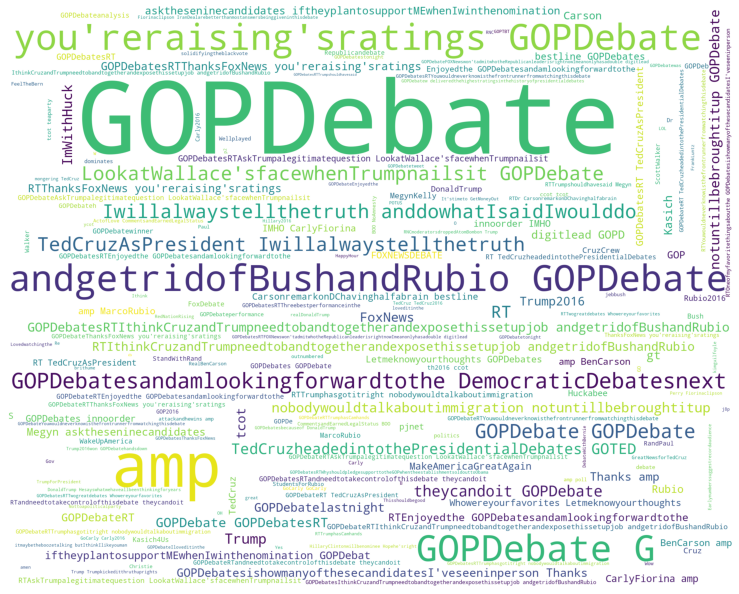

Negative words


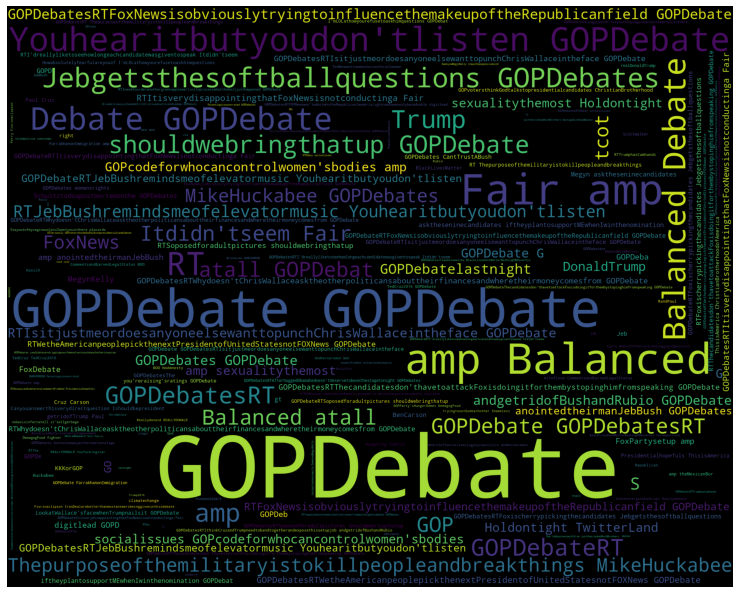

In [11]:
train_pos=train[ train['sentiment']=='Positive']
train_pos=train_pos['text']
train_neg=train[train['sentiment']=='Negative']
train_neg=train_neg['text']
def wordcloud_draw(data,color='black'):
    words=''.join(data)
    cleaned_word="".join([word for word in words.split()
                          if 'http' not in word
                          and not word.startswith('@')
                          and word != 'RT'
                         ])
    wordcloud=WordCloud(stopwords=STOPWORDS,
                       background_color=color,
                       width=2500,
                       height=2000
                       ).generate(cleaned_word)
    plt.figure(1,figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)



# Stopwords are used in tweets to avoid unecessary words

In [12]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

# Features in words and tweets are extracted

In [13]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

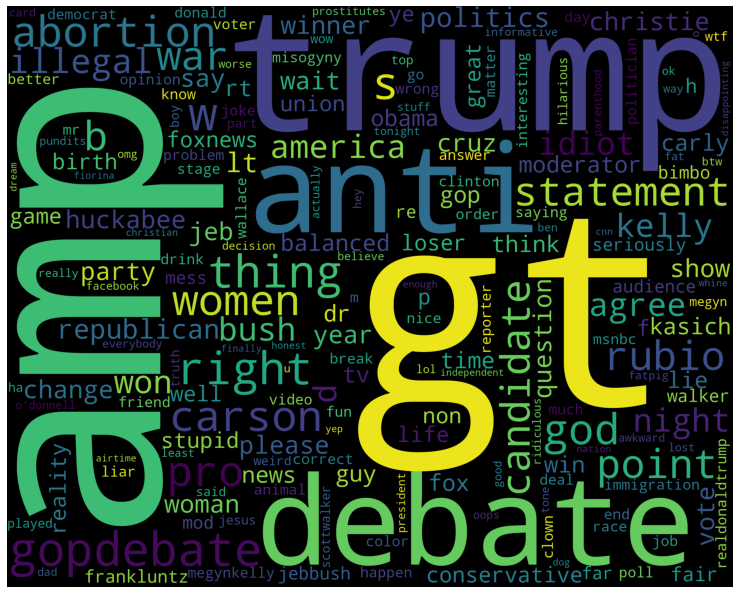

In [14]:
wordcloud_draw(w_features)

# NaiveBayesClassifier is applied to extracted features

In [15]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

# Accuracy of the naive bayes classifier is measured

In [16]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 890/847 
[Positive]: 208/68 
